Evaluating SEEN (train) at: 'Road_Damage/train'


image 1/1 C:\Users\jazzb\ImageDetection-Yolov11\Road_Damage\train\alligator_crack_issues\images\2 - Alligator Cracks (1).jpg: 640x640 alligator_crack_issues 1.00, potholes 0.00, crack_issues 0.00, ravelling 0.00, open_manhole 0.00, 24.6ms
Speed: 10.3ms preprocess, 24.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\jazzb\ImageDetection-Yolov11\Road_Damage\train\alligator_crack_issues\images\2 - Alligator Cracks (1)_affine.jpg: 640x640 alligator_crack_issues 1.00, potholes 0.00, crack_issues 0.00, ravelling 0.00, open_manhole 0.00, 26.2ms
Speed: 9.6ms preprocess, 26.2ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\jazzb\ImageDetection-Yolov11\Road_Damage\train\alligator_crack_issues\images\2 - Alligator Cracks (1)_horizontal_flip.jpg: 640x640 alligator_crack_issues 1.00, potholes 0.00, crack_issues 0.00, ravelling 0.00, open_manhole 0.00, 25.3ms
Speed: 8.8ms 

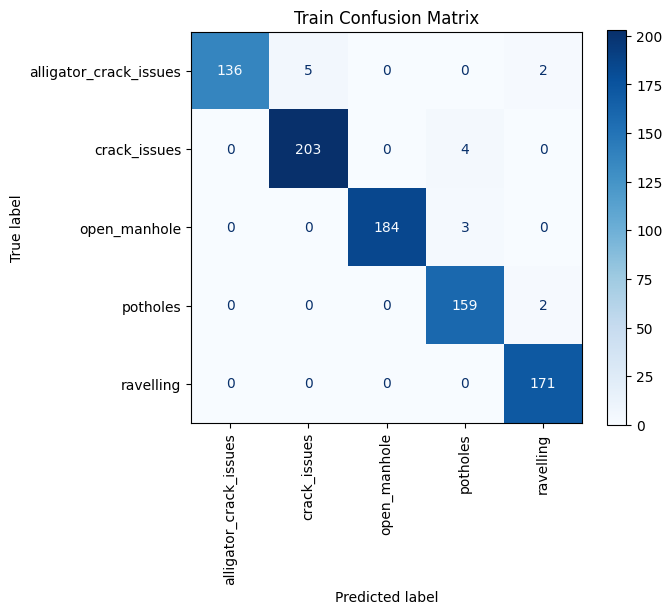

In [4]:
# ─────────────── Evaluate on SEEN (train) data ───────────────

from ultralytics import YOLO
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# 1. Load model
weights = "Road_Damage/final_model/best_fold.pt"
model   = YOLO(weights)

# 2. Prepare class indices (excluding "no_damage")
names = model.names.copy()
name_to_idx = {v: k for k, v in names.items()}
folders = list(name_to_idx.keys())  # e.g., ['potholes', 'crack_issues', ...]

# 3. Evaluate
root = "Road_Damage/v"
print(f"Evaluating SEEN (train) at: {root!r}\n")

y_true, y_pred = [], []
for fld in folders:
    img_dir = os.path.join(root, fld, "images")
    if not os.path.isdir(img_dir): 
        continue
    for fn in sorted(os.listdir(img_dir)):
        if not fn.lower().endswith((".jpg", ".jpeg", ".png")):
            continue
        y_true.append(name_to_idx[fld])
        res = model(os.path.join(img_dir, fn), imgsz=640)[0]
        top_idx = int(res.probs.top1)
        y_pred.append(top_idx)

# 4. Report & plot
labels = sorted(name_to_idx.values())
target_names = [names[i] for i in labels]

print("📊 Seen (train) Classification Report:\n")
print(classification_report(
    y_true, y_pred,
    labels=labels,
    target_names=target_names,
    zero_division=0
))

cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(7, 6))
disp.plot(ax=ax, cmap="Blues", xticks_rotation="vertical")
plt.title("Train Confusion Matrix")
plt.tight_layout()
plt.show()
